<a target="_blank" href="https://colab.research.google.com/github/taobrienlbl/advanced_earth_science_data_analysis/blob/spring_2023_iub/lessons/11_spectral_analysis_intro/11_workalong_01_fft.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

This notebook explores Fourier transforms and the `numpy.fft` package on some simple examples and realistic problems.

In [1]:
""" Import libraries. """
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as plt

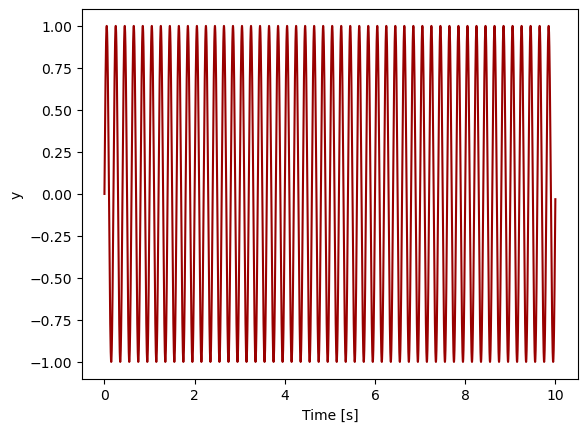

In [2]:
""" Create and plot a test signal. """
freq = 5  # Hz
# create a time variable
dt = 0.001  # seconds
t = np.arange(0, 10, dt)

# create a test signal
y = np.sin(2*np.pi*freq*t)

fig , ax = plt.subplots()
plt.plot(t, y, color='#990000')
ax.set_xlabel("Time [s]")
ax.set_ylabel("y")
plt.show()

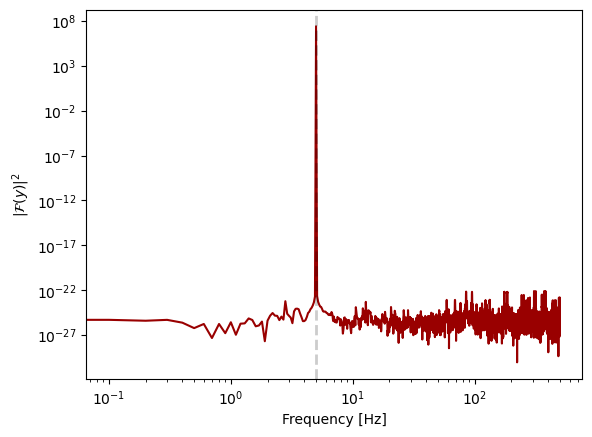

In [3]:
""" Compute the FFT of the test signal. """
y_fft = fft.rfft(y)

# compute the power spectrum from the fft
y_power = np.abs(y_fft)**2

# get the frequencies
freqs = fft.rfftfreq(len(y), dt)

# plot the power frequencies
fig , ax = plt.subplots()
plt.plot(freqs, y_power, color='#990000')
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("$|\mathcal{F}(y)|^2$")


# plot a line at the known frequency of the test signal
ax.axvline(freq, color='black', linestyle='--', alpha=0.2, linewidth=2)
plt.show()

In [4]:
""" Make a function to compute the power spectrum of a signal. """

def power_spectrum(y, t):
    """ Compute the power spectrum of a signal. Returns frequencies and the power spectrum: freqs, y_power """
    y_fft = fft.rfft(y)
    # compute the power spectrum from the fft
    y_power = np.abs(y_fft)**2
    # calculate dt
    dt = t[1] - t[0]
    # get the frequencies
    freqs = fft.rfftfreq(len(y), dt)
    
    return freqs, y_power


# also make a function for plotting
def plot_power_spectrum(freqs, y_power):
    """ Plots the power spectrum of a signal.  Returns the figure and axes: fig, ax """
    fig , ax = plt.subplots()
    plt.plot(freqs, y_power, color='#990000')
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel("Frequency [Hz]")
    ax.set_ylabel("$|\mathcal{F}(y)|^2$")
    
    plt.show()
    return fig, ax


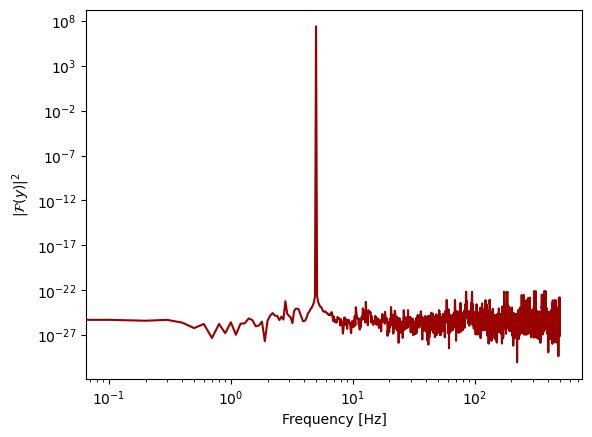

In [5]:
# test functions
freqs, y_power = power_spectrum(y, t)
fig, ax = plot_power_spectrum(freqs, y_power)

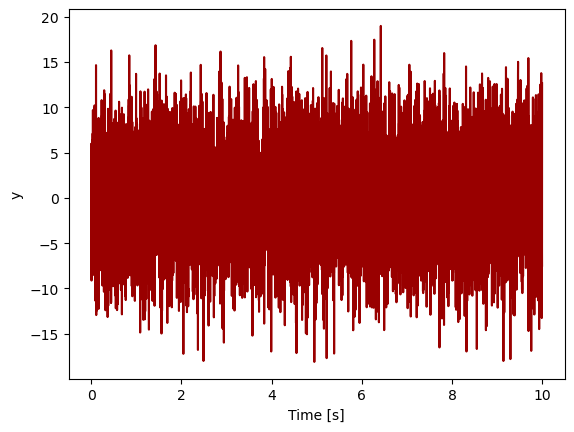

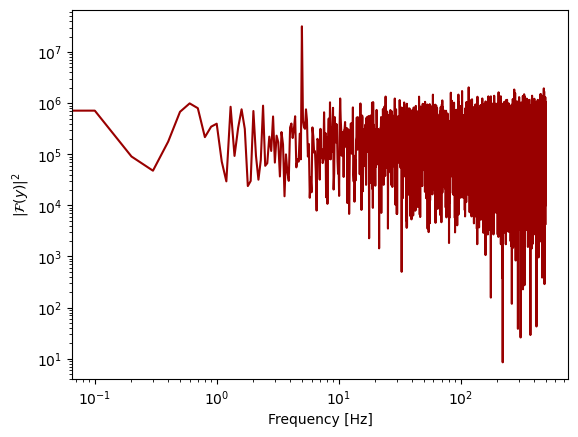

In [6]:
""" Get the power spectrum with noise added. """
y_noise = y + np.random.normal(0, 5, len(y))

# plot the noisy signal
fig, ax = plt.subplots()
plt.plot(t, y_noise, color='#990000')
ax.set_xlabel("Time [s]")
ax.set_ylabel("y")
plt.show()

freqs, y_power = power_spectrum(y_noise, t)
fig, ax = plot_power_spectrum(freqs, y_power)

# Real data

Download this data file: https://github.com/taobrienlbl/advanced_earth_science_data_analysis/blob/spring_2023_iub/lessons/11_spectral_analysis_intro/cannelton_flow.dat

The data file was obtained from https://waterdata.usgs.gov/nwis/dv/?site_no=03303280&PARAmeter_cd=00060 on 11/10/23 at about 11:16 AM Eastern.  It represents daily stream flow from 1975-present at a gauge on the Ohio River in Cannelton, IN

In [7]:
import pandas as pd

In [11]:
""" Load the data file. """
stream_flow_url = "https://raw.githubusercontent.com/taobrienlbl/advanced_earth_science_data_analysis/spring_2023_iub/lessons/11_spectral_analysis_intro/cannelton_flow.dat"
stream_flow_df = pd.read_csv(stream_flow_url, sep= '\t', skiprows=30, header=None, 
                             names = ['agency', 'site', 'date', 'flow', 'flag'], parse_dates=['date'])
stream_flow_df.head()

,agency,site,date,flow,flag
0,USGS,3303280,1975-10-01,94800,A
1,USGS,3303280,1975-10-02,79900,A
2,USGS,3303280,1975-10-03,69000,A
3,USGS,3303280,1975-10-04,74700,A
4,USGS,3303280,1975-10-05,71700,A


In [ ]:
""" Plot a time series of the data. """
fig, ax = plt.subplots(figsize=(10,5))


In [ ]:
""" Plot the power spectrum of the data. """


In [ ]:
""" Plot the power spectrum of the data with the x-axis as period instead. """
